# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [1]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

=	71
{	70
class="menu-item	64
menu-item-type-post_type	62
menu-item-object-page	62
}	56
<div	49
</div>	45
and	41
<a	32
of	30
/>	29
-->	28
if	27


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [1]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

nltk.download('stopwords')#uncomment if not yet downloaded

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giuseppe.schintu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


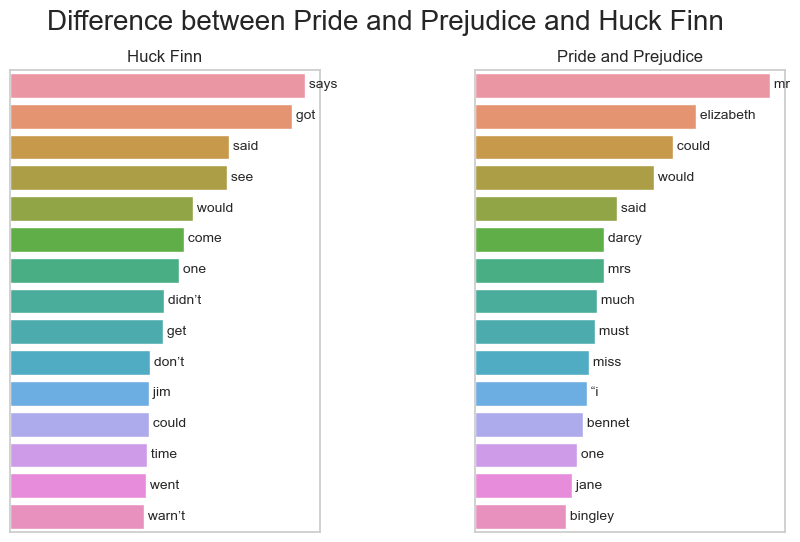

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plotTwoLists(wf_ee, wf_bu, title):
    sns.set(style="whitegrid")
    f, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

    f.suptitle(title, fontsize=20)
    
    wf_bu_sorted = sorted(wf_bu, key=lambda x: x[1], reverse=True)
    wf_ee_sorted = sorted(wf_ee, key=lambda x: x[1], reverse=True)

    sns.barplot(x=[x[1] for x in wf_bu_sorted], y=[x[0] for x in wf_bu_sorted], ax=ax2)
    ax2.set_title("Huck Finn")
    ax2.set(ylabel='')

    sns.barplot(x=[x[1] for x in wf_ee_sorted], y=[x[0] for x in wf_ee_sorted], ax=ax1)
    ax1.set_title("Pride and Prejudice")
    ax2.set_yticklabels([])
    ax1.set_yticklabels([])

    # Adding words inside the bars
    for i, (word, freq) in enumerate(wf_bu_sorted):
        ax2.text(freq, i, f' {word}', va='center', fontsize=10)

    for i, (word, freq) in enumerate(wf_ee_sorted):
        ax1.text(freq, i, f' {word}', va='center', fontsize=10)

    # Remove larger axis labels and grid lines
    ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.grid(False)
    ax1.grid(False)
    plt.subplots_adjust(wspace=0.5)

plotTwoLists(wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

plt.show()


# 545 M1 Homework

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?
1. Reflect on the difference between the two authors. What is your interpretation?
1. Include each of the above as markdown cells. Upload a copy of your notebook and a rendering as .html or PDF.

## Run global libraries and functions

In [5]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')#uncomment if not yet downloaded

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

def plotTwoLists(wf_ee, wf_bu, title, wf_ee_title, wf_bu_title):
    sns.set(style="whitegrid")
    f, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

    f.suptitle(title, fontsize=20)
    
    wf_bu_sorted = sorted(wf_bu, key=lambda x: x[1], reverse=True)
    wf_ee_sorted = sorted(wf_ee, key=lambda x: x[1], reverse=True)

    sns.barplot(x=[x[1] for x in wf_bu_sorted], y=[x[0] for x in wf_bu_sorted], ax=ax2)
    ax2.set_title(wf_bu_title)
    ax2.set(ylabel='')

    sns.barplot(x=[x[1] for x in wf_ee_sorted], y=[x[0] for x in wf_ee_sorted], ax=ax1)
    ax1.set_title(wf_ee_title)
    ax2.set_yticklabels([])
    ax1.set_yticklabels([])

    # Adding words inside the bars
    for i, (word, freq) in enumerate(wf_bu_sorted):
        ax2.text(freq, i, f' {word}', va='center', fontsize=10)

    for i, (word, freq) in enumerate(wf_ee_sorted):
        ax1.text(freq, i, f' {word}', va='center', fontsize=10)

    # Remove larger axis labels and grid lines
    ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.grid(False)
    ax1.grid(False)
    plt.subplots_adjust(wspace=0.5)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giuseppe.schintu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Compare word frequencies between two works of a single author.
Daniel Defoe books from Project Gutenberg:
- The Life and Adventures of Robinson Crusoe by Daniel Defoe at https://www.gutenberg.org/ebooks/521.txt.utf-8
- The Fortunes and Misfortunes of the Famous Moll Flanders by Daniel Defoe at https://www.gutenberg.org/ebooks/370.txt.utf-8

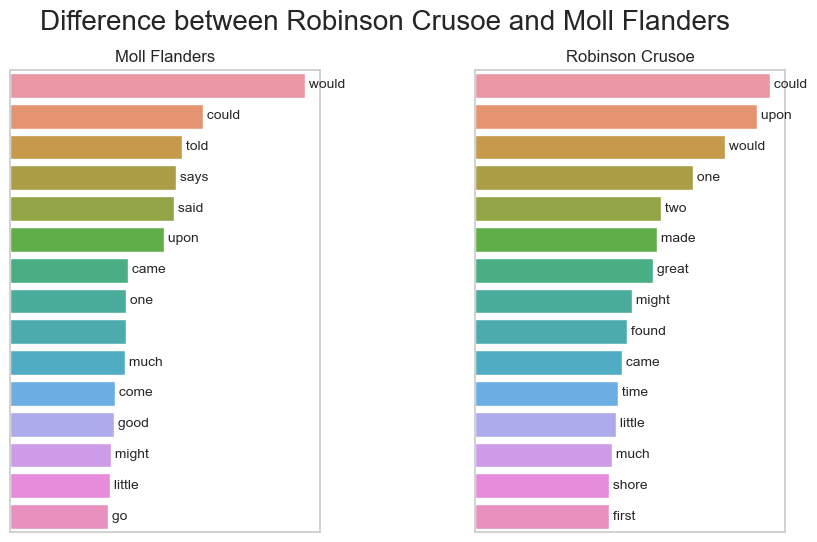

In [6]:
# populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/370.txt.utf-8')

# Show comparison plot of frequencies
plotTwoLists(wf_ee, wf_bu, 'Difference between Robinson Crusoe and Moll Flanders', 'Robinson Crusoe', 'Moll Flanders')
plt.show()

### 1. Compare word frequencies between works of two authors.
Daniel Defoe and Jules Verne books from Project Gutenberg:
- The Life and Adventures of Robinson Crusoe by Daniel Defoe at https://www.gutenberg.org/ebooks/521.txt.utf-8
- Around the World in Eighty Days by Jules Verne at https://www.gutenberg.org/ebooks/103.txt.utf-8

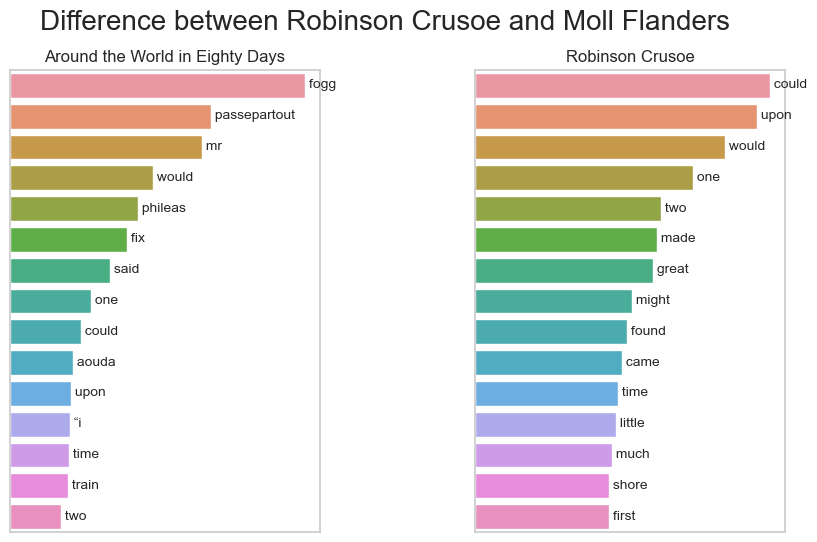

In [7]:
# populate two lists from two different authors    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/103.txt.utf-8')

# Show comparison plot of frequencies
plotTwoLists(wf_ee, wf_bu, 'Difference between Robinson Crusoe and Moll Flanders', 'Robinson Crusoe', 'Around the World in Eighty Days')
plt.show()